In [50]:
import numpy as np

In [51]:
# 입력 문장 (모델 입력)
raw_inputs = [
             "나는 학생 입니다",
             "나는 좋은 선생님 입니다",
             "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생(1) 기타(0)
raw_labels = [1, 0, 0]

In [52]:
words = []
for s in raw_inputs:
    print("s.split() - ", s.split())
    words.extend(s.split()) #extend는 iterable의 각 항목들을 넣습니다
    print(words)

s.split() -  ['나는', '학생', '입니다']
['나는', '학생', '입니다']
s.split() -  ['나는', '좋은', '선생님', '입니다']
['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다']
s.split() -  ['당신은', '매우', '좋은', '선생님', '입니다']
['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [53]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [94]:
# 중복 단어 제거
words = list(dict.fromkeys(words)) #딕셔너리를 생성할 때 편리하게 사용할 수 있는 메서드
print("dict.fromkeys(words)", dict.fromkeys(words))
print(words)

dict.fromkeys(words) {'나는': None, '학생': None, '입니다': None, '좋은': None, '선생님': None, '당신은': None, '매우': None}
['나는', '학생', '입니다', '좋은', '선생님', '당신은', '매우']


In [55]:
word_to_id = {"<PAD>" : 0, "<UNK>" : 1}
for w in words:
    word_to_id[w] = len(word_to_id)
    print(word_to_id)

{'<PAD>': 0, '<UNK>': 1, '나는': 2}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}


In [56]:
# 키, 값 위치 변경
id_to_word = {i : w for w,i in word_to_id.items()}
print(id_to_word)

{0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [95]:
train_inputs = []
print("raw_inputs - ", raw_inputs)
print()
print("word_to_id - ", word_to_id)
print()

for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()] # row변수에 dict에 맞는 값이 들어감
    print("row = ", row)
    # padding
    row += [0] * (5-len(row)) # 5 범위 안에서 0 추가
    train_inputs.append(row)
# array로 변환
train_inputs = np.array(train_inputs)
print()
print(train_inputs)

raw_inputs -  ['나는 학생 입니다', '나는 좋은 선생님 입니다', '당신은 매우 좋은 선생님 입니다']

word_to_id -  {'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}

row =  [2, 3, 4]
row =  [2, 5, 6, 4]
row =  [7, 8, 5, 6, 4]

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [58]:
train_inputs.shape

(3, 5)

In [59]:
# one-hot matrix 생성
onehot_matrix = np.eye(len(word_to_id)) # 대각선에 1을 추가해주는 함수
print(onehot_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [97]:
print("train_inputs \n",train_inputs)
print()

train_onehot = onehot_matrix[train_inputs]
print(train_onehot) # 각각 데이터가 존재하는 위치에 1생성 

train_inputs 
 [[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [61]:
train_onehot.shape

(3, 5, 9)

In [98]:
#원 핫 인코딩을 원래대로 돌리기

# 각 위치에서 최댓값이 존재하는 인덱스 반환
print(np.argmax(train_onehot, axis = -1))

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [63]:
# embedding layer 만들기
x = np.argmax(train_onehot, axis = -1)
x.shape

(3, 5)

In [64]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [65]:
x_len = train_onehot.shape

In [66]:
print(x_len)

(3, 5, 9)


In [67]:
# 텐서 생성
inp = tf.convert_to_tensor(x, dtype=tf.int32)
inp.shape

TensorShape([3, 5])

In [68]:
inp_len = tf.convert_to_tensor(x_len, dtype=tf.int32)
inp_len.shape

TensorShape([3])

In [69]:
print(inp)
print(inp_len)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]], shape=(3, 5), dtype=int32)
tf.Tensor([3 5 9], shape=(3,), dtype=int32)


In [70]:
inp, inp_len

(<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
 array([[2, 3, 4, 0, 0],
        [2, 5, 6, 4, 0],
        [7, 8, 5, 6, 4]], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 5, 9], dtype=int32)>)

In [71]:
vocab = 1000
dim = 3
embed = L.Embedding(vocab, dim)
embed

In [72]:
# 원 핫 인코딩은 1과 0으로만 이루어져 있어서 단어사이의 유사도나 거리를 표현하기 어렵지만
# 임베딩 레이어를 지나면 이 문제를 해결할 수 있다.
embed(inp)

<tf.Tensor: shape=(3, 5, 3), dtype=float32, numpy=
array([[[ 0.0107886 ,  0.02467755, -0.01209657],
        [-0.0094117 ,  0.0267804 ,  0.01746608],
        [-0.04687738, -0.01926975,  0.02414938],
        [-0.02681565, -0.02393568,  0.04560412],
        [-0.02681565, -0.02393568,  0.04560412]],

       [[ 0.0107886 ,  0.02467755, -0.01209657],
        [ 0.00767297, -0.02886254, -0.0489419 ],
        [-0.01328571,  0.03015878, -0.01676349],
        [-0.04687738, -0.01926975,  0.02414938],
        [-0.02681565, -0.02393568,  0.04560412]],

       [[ 0.0498885 ,  0.01837978,  0.04771766],
        [ 0.04752591, -0.02666477, -0.02868396],
        [ 0.00767297, -0.02886254, -0.0489419 ],
        [-0.01328571,  0.03015878, -0.01676349],
        [-0.04687738, -0.01926975,  0.02414938]]], dtype=float32)>

# word2vec

## abc 뉴스데이터로 word2vec

In [73]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
# 단어장 생성
corpus = abc.sents()

In [75]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [76]:
print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [77]:
from gensim.models import Word2Vec
# 단어를 임베딩 벡터로 변환
model = Word2Vec(sentences = corpus, size = 100, window=5, min_count=5, workers=4, sg=0)

In [78]:
#man과 관련된 단어들 확인
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9334017038345337), ('Bang', 0.9260777235031128), ('third', 0.9143373966217041), ('asteroid', 0.9143068194389343), ('skull', 0.9121795892715454), ('rally', 0.9100260138511658), ('dinosaur', 0.9051157236099243), ('dog', 0.9037201404571533), ('conviction', 0.9006043672561646), ('infant', 0.8994042873382568)]


In [79]:
from gensim.models import KeyedVectors

#  모델 저장
model.wv.save_word2vec_format('./w2v')

In [80]:
# 모델 불러오기
loaded_model = KeyedVectors.load_word2vec_format("./w2v")

print('모델 load완료!')

모델 load완료!


In [81]:
# 단어장에 없는 단어는 오류 출력
loaded_model.most_similar('overacting') #KeyError: "word 'overacting' not in vocabulary"

KeyError: ignored

## 한국어 word2vec 만들기

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.4 MB/s 
     |████████████████████████████████| 448 kB 39.1 MB/s 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [5]:
# 긍정 부정 레이블 된 리뷰 코퍼스
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f01bccfa990>)

In [9]:
train_data = pd.read_table('ratings.txt')
print(len(train_data))
train_data[:5]

200000


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [10]:
# 결측치 유무 확인
print(train_data.isnull().values.any())

True


In [11]:
train_data = train_data.dropna(how='any') # null값이 존재하는 행 제거
print("결측치 유무 : ", train_data.isnull().values.any())
print("갯수 : ", len(train_data))

결측치 유무 :  False
갯수 :  199992


In [12]:
train_data['document'] = train_data['document'].str.replace("[^가-힣] ","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [13]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이...,1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.최고.,1
3,9251303,와.연기가 진짜 개쩔구나.지루할거라고 생각했는데 몰입해서 봤다.그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [14]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [16]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_x)

In [22]:
print(tokenized_data[:10])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다', '.'], ['폴리스스토리', '시리즈', '1', '부터', '뉴', '까지', '버리다', '하나', '없다', '.', '최고', '.'], ['오다', '.', '연기', '진짜', '개', '쩔다', '.', '지루하다', '생각', '몰입', '보다', '.', '그렇다', '이렇다', '진짜', '영화', '지'], ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화', '.'], ['사랑', '을', '해보다', '사람', '라면', '처음', '부터', '끝', '까지', '웃다', '있다', '영화'], ['완전', '감동', '이다', '다시', '보다', '감동'], ['개', '전쟁', '나오다', '나오다', '1', '빠', '로', '보고', '싶다'], ['굿'], ['바보', '아니다', '병', '쉰', '이다']]


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 11.906041241649666


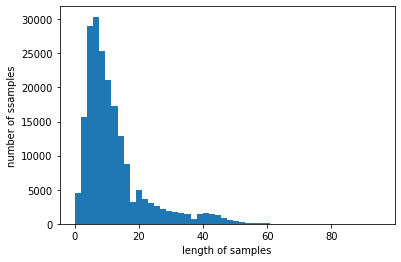

In [23]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of ssamples')
plt.show()

In [24]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count = 5, workers=4, sg=0)

In [25]:
model.wv.vectors.shape

(17526, 100)

In [26]:
print(model.wv.most_similar("최민식"))

[('김명민', 0.8428424000740051), ('한석규', 0.8301931619644165), ('양동근', 0.8207179307937622), ('김수현', 0.8088511228561401), ('류덕환', 0.8065834641456604), ('송강호', 0.8059990406036377), ('유다인', 0.8056329488754272), ('이정재', 0.8004124164581299), ('서영희', 0.8003474473953247), ('단역', 0.7999763488769531)]


In [27]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8747021555900574), ('무협', 0.8638120889663696), ('호러', 0.8584805727005005), ('SF', 0.8423019647598267), ('블록버스터', 0.8281365633010864), ('느와르', 0.8256301879882812), ('멜로', 0.8206430673599243), ('sf', 0.8127169013023376), ('물', 0.8105957508087158), ('물의', 0.8074870109558105)]


In [28]:
print(model.wv.most_similar("영화"))

[('독립영화', 0.6220220327377319), ('공포영화', 0.6097229719161987), ('다큐', 0.6023816466331482), ('애니메이션', 0.5959468483924866), ('애니', 0.5785338878631592), ('작품', 0.5636599063873291), ('다큐멘터리', 0.5612900853157043), ('이영화', 0.560374915599823), ('영화로', 0.5517711043357849), ('액션영화', 0.5323339104652405)]


In [29]:
print(model.wv.most_similar("뽀로로"))

[('더파이팅', 0.8374214768409729), ('유로트립', 0.8316824436187744), ('훨배', 0.8315232992172241), ('젝키', 0.8287947773933411), ('``', 0.82691490650177), ('ㅆ', 0.8251501321792603), ('보다야', 0.8250706791877747), ('아이스', 0.8206607103347778), ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 0.8188209533691406), ('호호', 0.818265438079834)]


# 사전 훈련된 워드 임베딩 (한국어)

In [31]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/dataset/ko.bin')

In [32]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [33]:
result = model.wv.most_similar("강아지", topn=50) # 상위 50개
result

[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164),
 ('까마귀', 0.6500682830810547),
 ('아주머니', 0.6432187557220459),
 ('독사', 0.6389124393463135),
 ('고슴도치', 0.6313384771347046),
 ('거북이', 0.6252505779266357),
 ('돼지', 0.6222692131996155),
 ('앵무새', 0.6218831539154053),
 ('개구리', 0.6218565702438354),
 ('당나귀', 0.6206705570220947),
 ('송아지', 0.6165446043014526),
 ('구미호', 0.615827202796936),
 ('메두사', 0.6134721040725708),
 ('사냥개', 0.6131488084793091),
 ('악어', 0.6128274202346802),
 ('뱀파이어', 0.6126487255096436),
 ('맹수', 0.609540581703186),
 ('갈기', 0.6087672114372253),
 ('아저씨', 0.6054108142852783),
 ('바구니', 0.6049458980560303),
 ('샴푸', 0.6020784974098206),
 ('잠자리', 0.6012549996376038),
 ('요괴', 0.6010540127754211),
 ('기러기', 0.6004207134246826),
 ('아기', 0.6002471446

# 사전 훈련된 워드 임베딩 (영어)

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [2]:
print(model.vectors.shape) # 300만개의 단어와 각 단어 차원이 300차원

(3000000, 300)


In [3]:
print(model.similarity('this' , 'is'))

0.40797037


In [17]:
print(model.similarity('post' , 'book'))

0.057204384


In [5]:
print(model['book']) # 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [6]:
model.most_similar('memory')

[('Memory', 0.6844282150268555),
 ('memories', 0.6138081550598145),
 ('Added_Tarbet', 0.5560144186019897),
 ('Earliest_sporting', 0.5375796556472778),
 ('Flash_memory', 0.5318928360939026),
 ('foam_mattress_topper', 0.5253582000732422),
 ('flash_memory', 0.5221431255340576),
 ('remembering', 0.5171269178390503),
 ('SODIMM_modules', 0.5119421482086182),
 ('components_microprocessors_CPUs', 0.5007408857345581)]

# Glove 훈련시키기

In [7]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 5.4 MB/s 


In [9]:
from glove import Corpus, Glove

In [13]:
corpus = Corpus()
result = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/영우_5기_자연어/수업안/dataset/GoogleNews-vectors-negative300.bin.gz',
                                                         binary=True)

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f68c942f050>)

In [ ]:
import re
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05) # 훈련데이터로 부터 glove에 사용할 동시 행렬 생성

In [ ]:
# 학습에 이용할 쓰레드 갯수는 4로 지정, 에포크는 20
glove.fit(corpus.matrix, epochs = 20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

In [ ]:
print(glove.most_similar("man"))

In [ ]:
print(glove.most_similar("boy"))

In [ ]:
print(glove.most_similar("university"))

#FastText

subword로 학습한다. 

apple --> [ap app ppl ple le]

In [ ]:
from gensim.models import FastText

In [ ]:
model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [ ]:
model.wv.most_similar("electrofishing")
# Word2Vec는 학습하지 않은 단어에 대해서 유사한 단어를 찾아내지 못 했지만, FastText는 유사한 단어를 계산해서 출력